In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Display full output in Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Load data
filepath ="./dat/online_shoppers_intention.csv.gz"
df = pd.read_csv(filepath, compression='gzip')

In [32]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5719,5,152.100000,0,0.0,27,1474.533333,0.014815,0.030123,27.897171,0.0,Oct,3,3,6,1,Returning_Visitor,True,False
6246,0,0.000000,1,0.0,17,982.757619,0.012500,0.035417,0.000000,0.0,Sep,2,5,2,1,Returning_Visitor,False,False
7758,11,289.683333,0,0.0,41,678.483333,0.000000,0.032174,13.572703,0.0,Oct,4,1,3,1,Returning_Visitor,False,True
1985,1,0.000000,0,0.0,21,574.722619,0.000000,0.018889,6.284045,0.0,Mar,2,2,1,2,Returning_Visitor,False,True
9751,4,112.875000,0,0.0,6,134.675000,0.000000,0.037037,0.000000,0.0,Nov,1,2,1,2,Returning_Visitor,False,False


### Task 1 - Classification

In [33]:
# Lets do some EDA
df.shape

(12330, 18)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [35]:
# Check for missing values
df.isna().sum().sum()

0

In [36]:
# Are there are single value columns?
for col in df.columns:
    print(col, df[col].unique().size)

Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


In [37]:
# There are 10 numerical features
num_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
# There are 7 categorical features
cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
# Label is the 8th categorical feature
target = 'Revenue'

In [38]:
# # For ML it is a good idea to convert categorical features to numerical

# # Lets look at non numerical features
# for col in df.columns:
#     if df[col].dtype == 'object' or df[col].dtype == 'bool':
#         print(col, df[col].unique())

In [72]:
# There seem to be no data for the month of January and April. 
# month_str2int = { 'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }
# df['Month'] = df['Month'].map(month_str2int)

# Dropped the idea as the model was performing worse

In [40]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<AxesSubplot:title={'center':'Sales made by month'}, xlabel='Month', ylabel='Sales'>

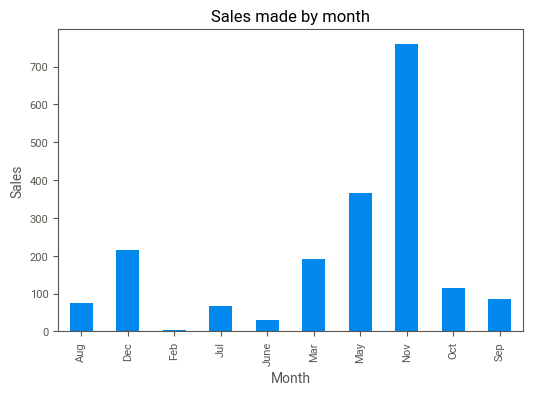

In [41]:
#Visualize sale over the year
sales_by_month = df.groupby('Month')['Revenue'].sum()
sales_by_month.plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

<AxesSubplot:title={'center':'Sales made by visitor type'}, xlabel='VisitorType'>

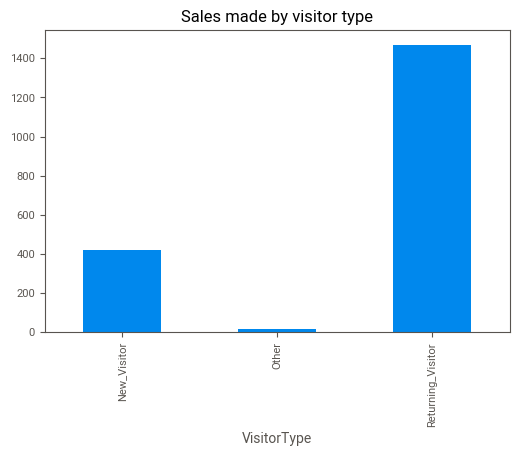

In [42]:
# Sales made by visitor type
df.groupby('VisitorType')['Revenue'].sum().plot(kind='bar', title='Sales made by visitor type')

                                             |          | [  0%]   00:00 -> (? left)


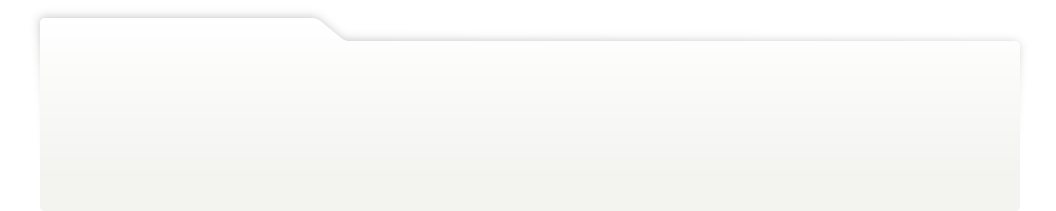
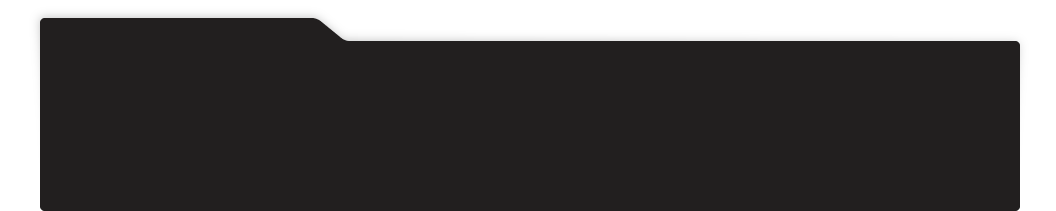
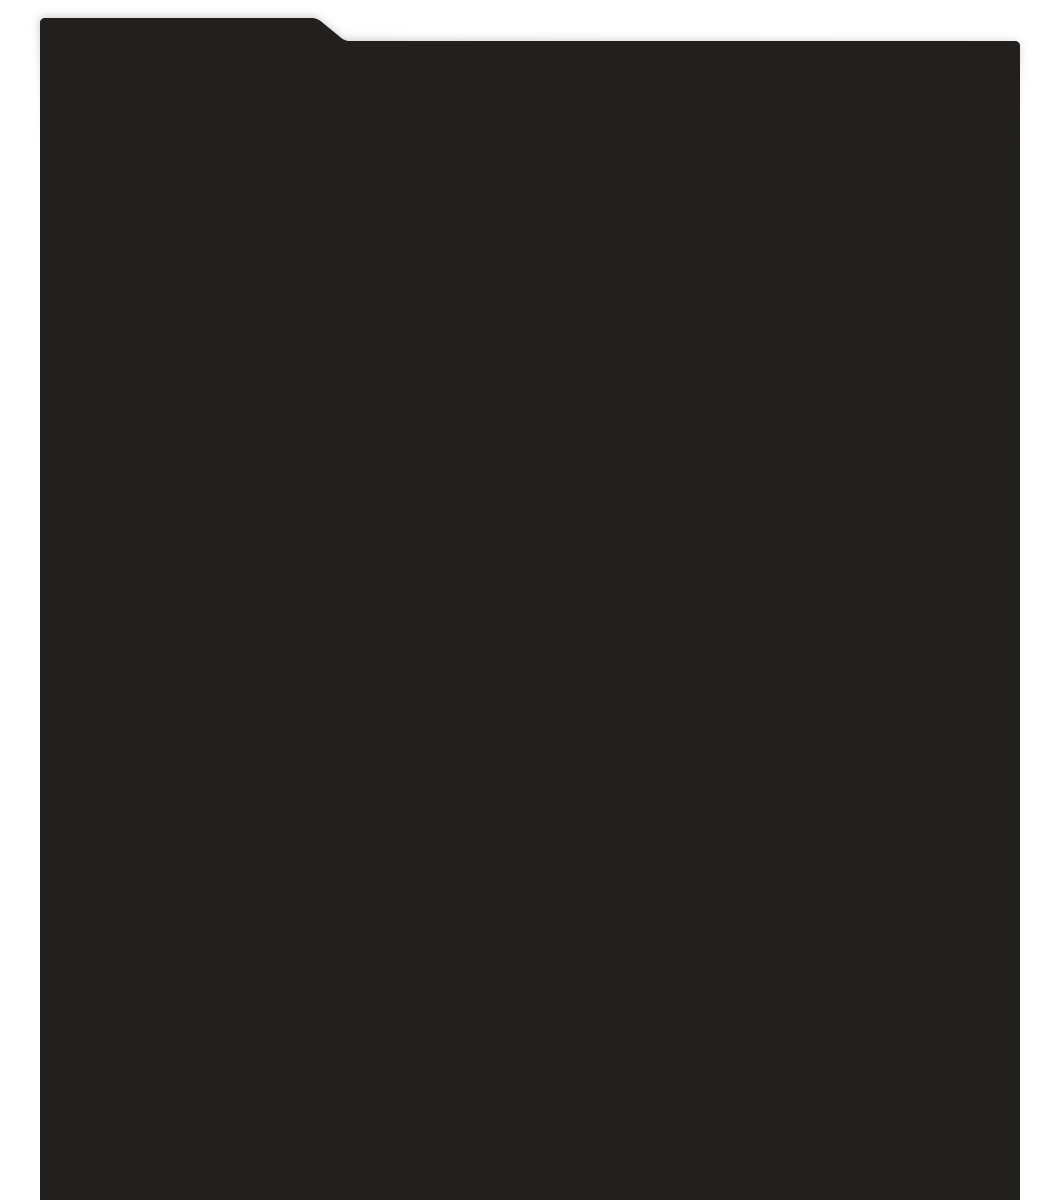
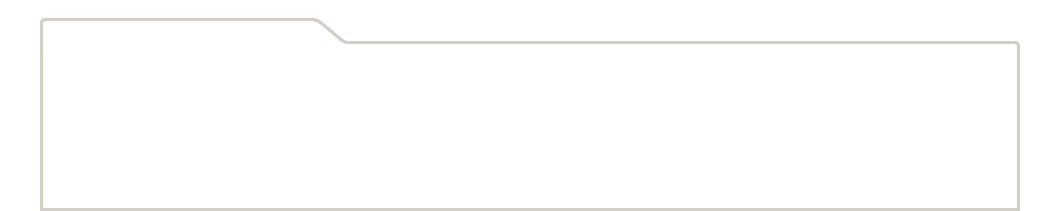
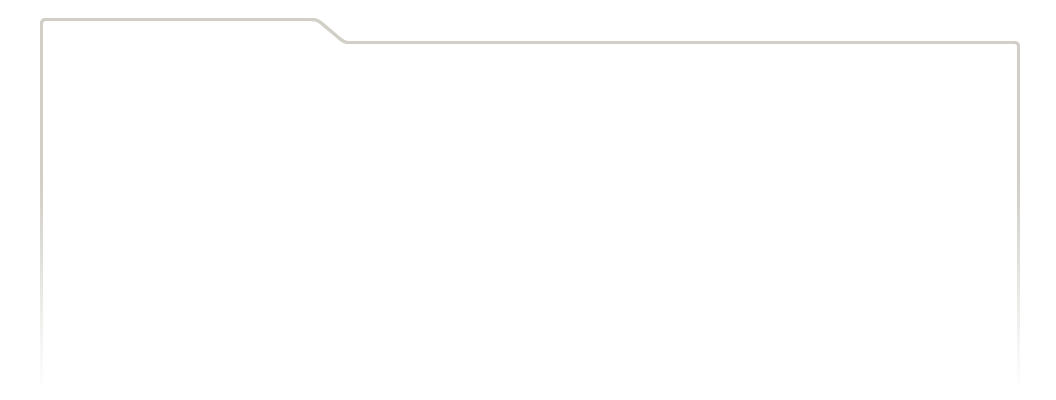
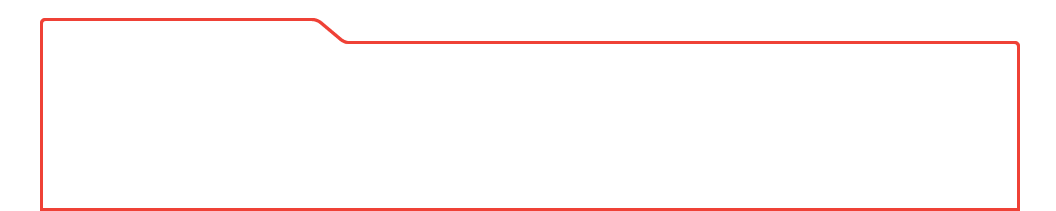
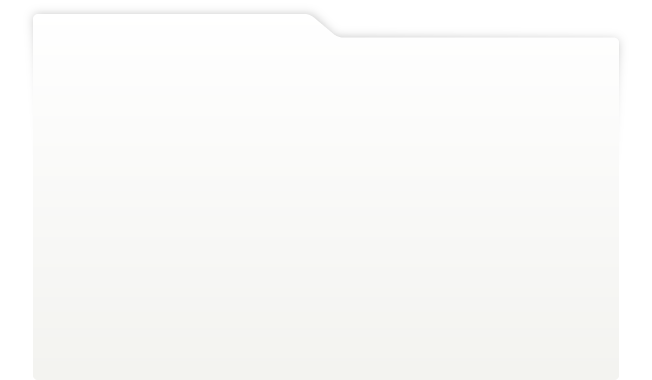
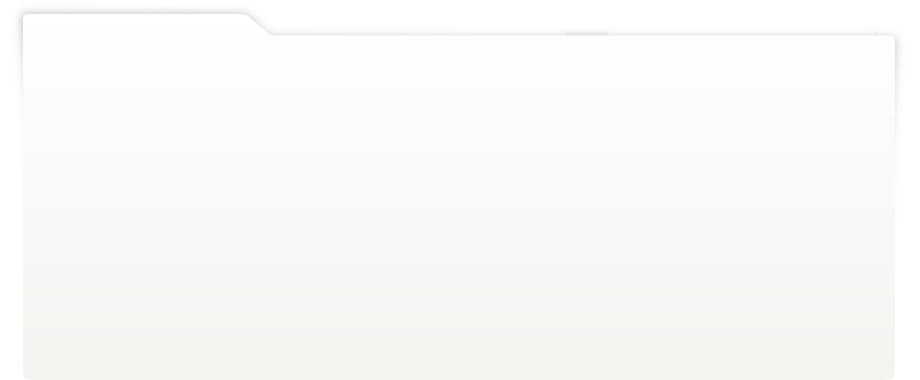
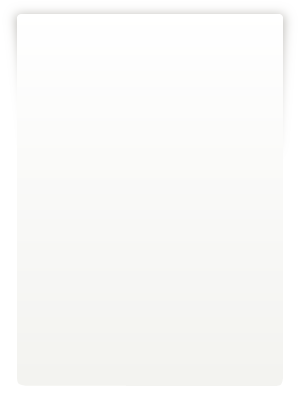
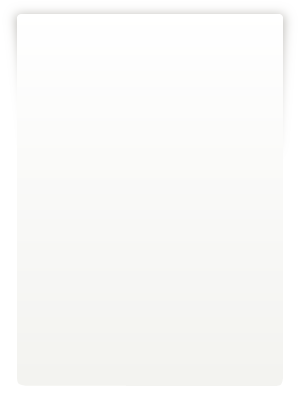
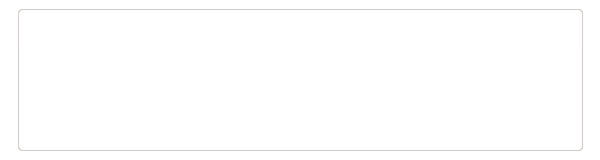
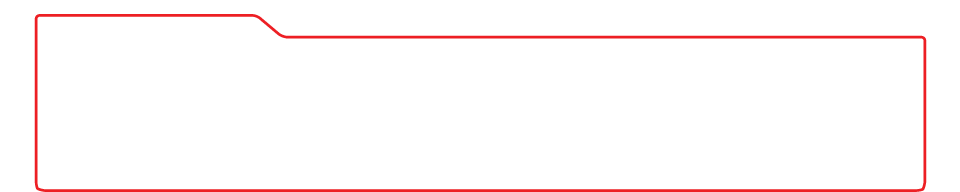
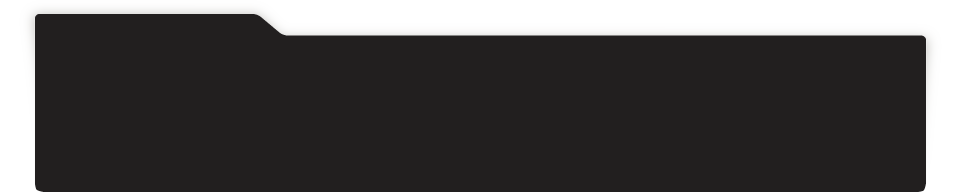
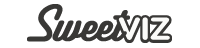
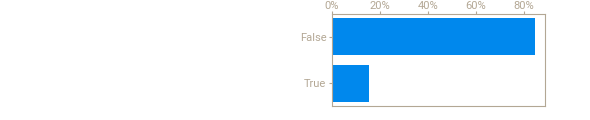
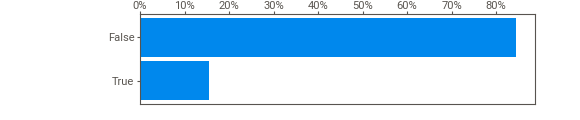
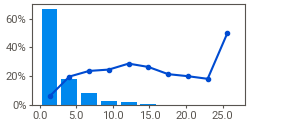
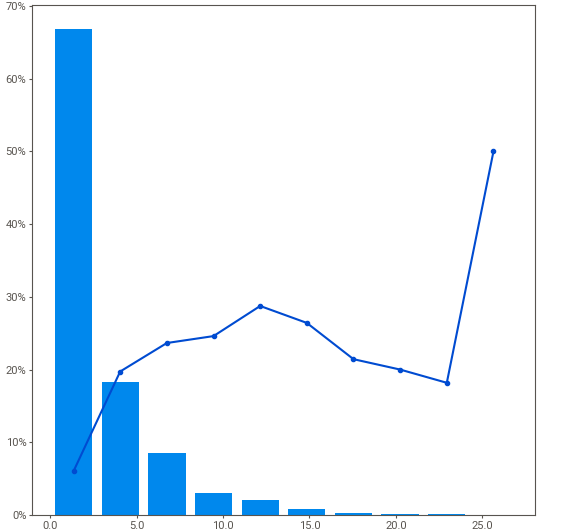
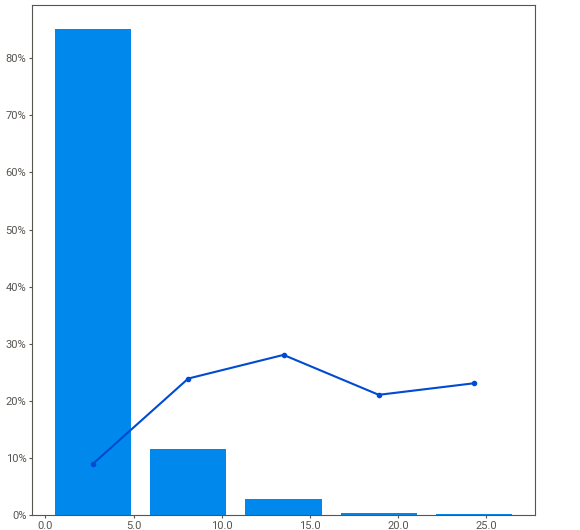
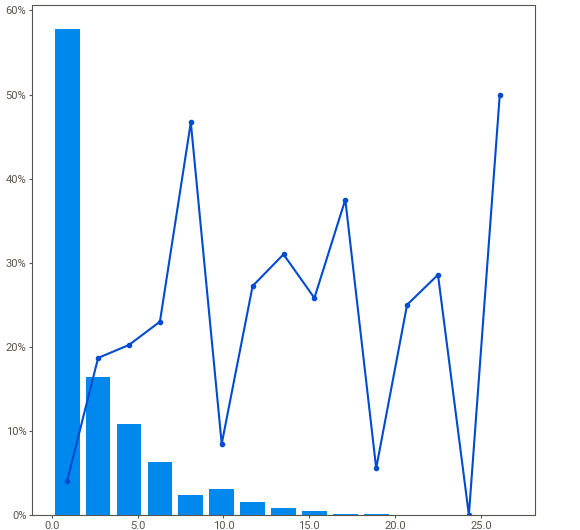
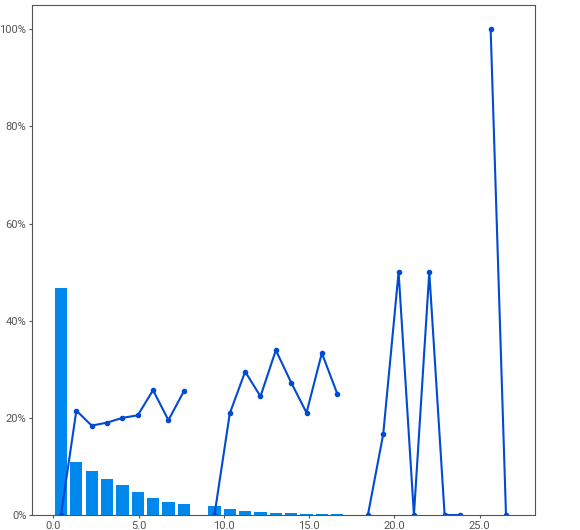
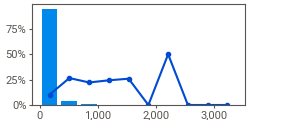
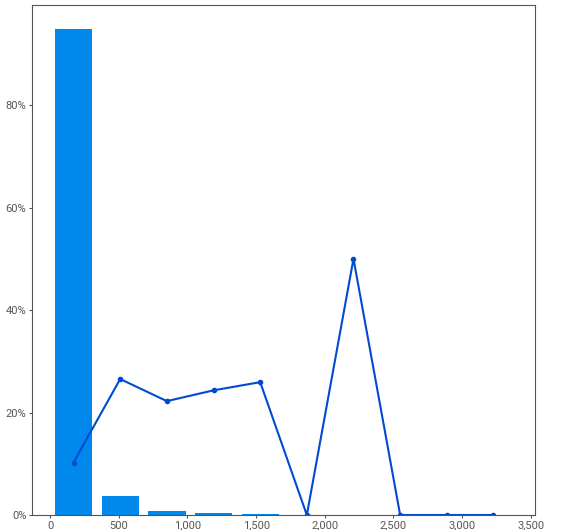
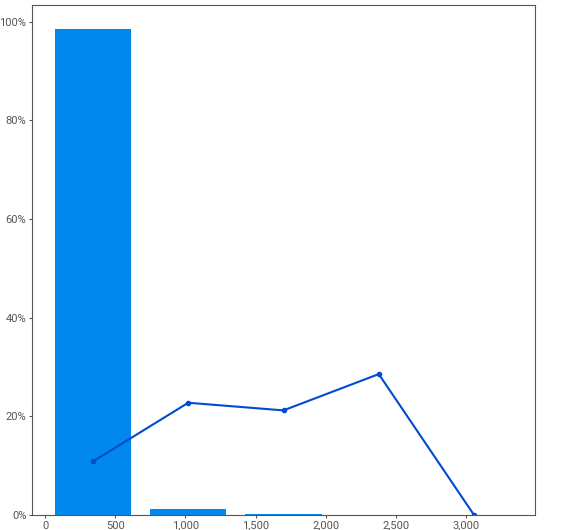
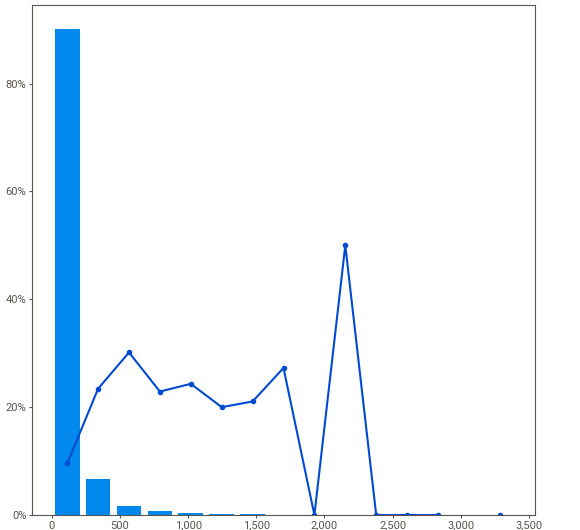
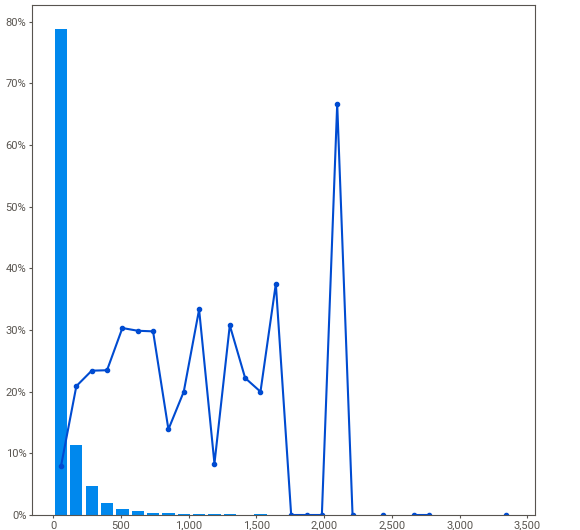
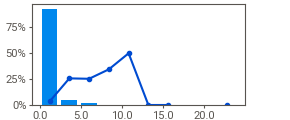
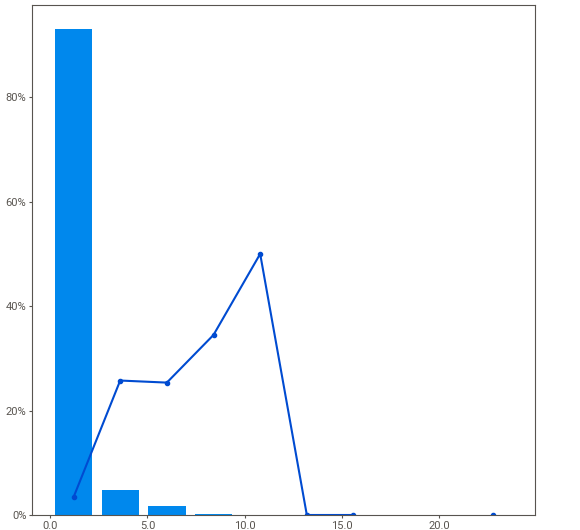
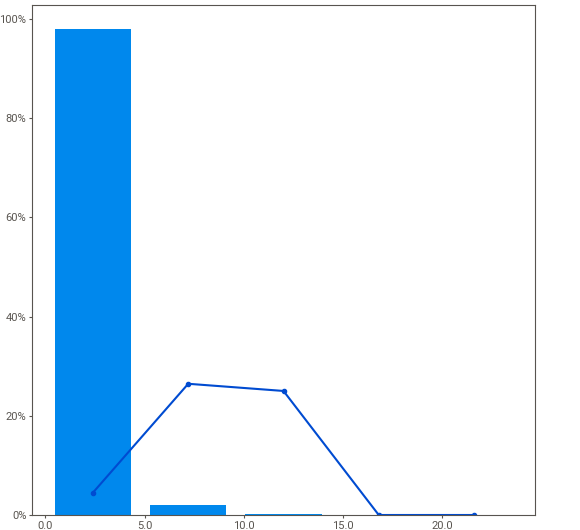
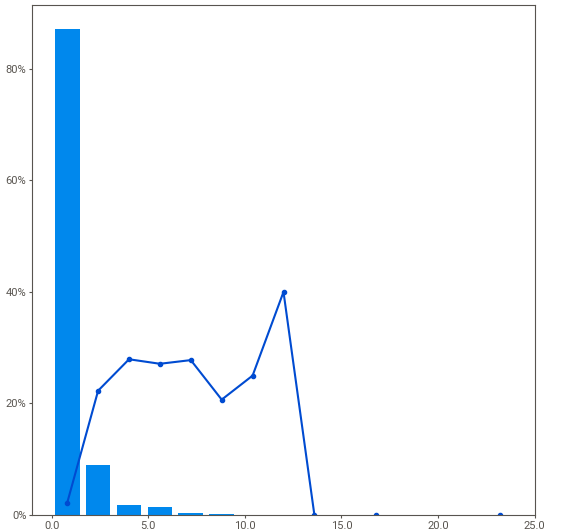
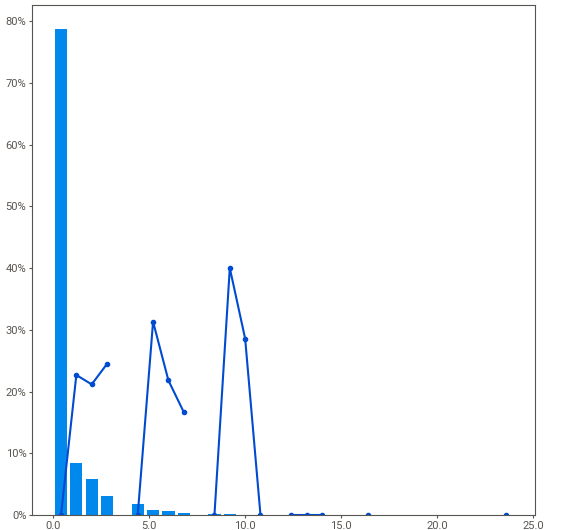
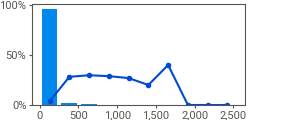
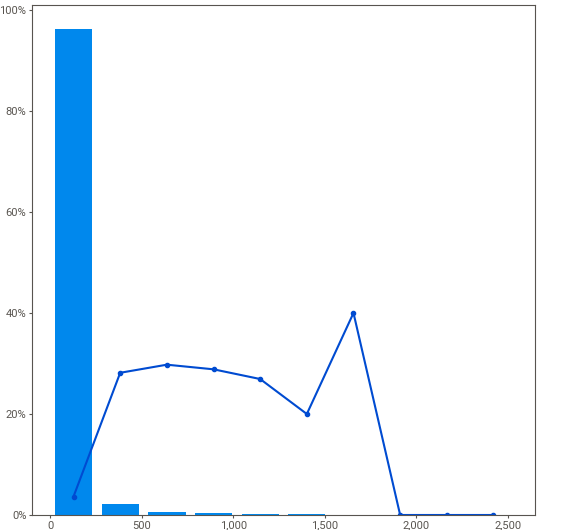
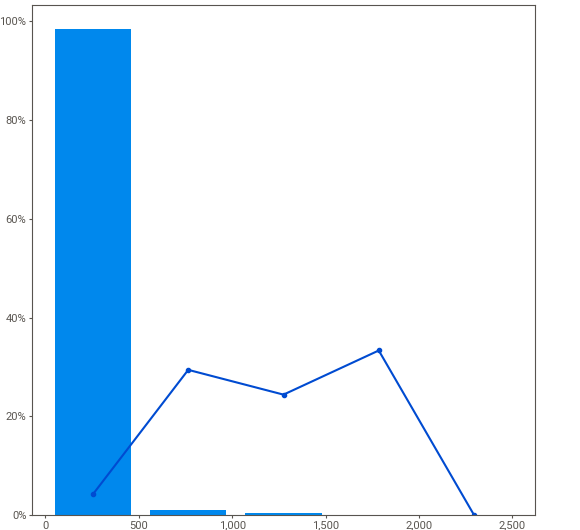
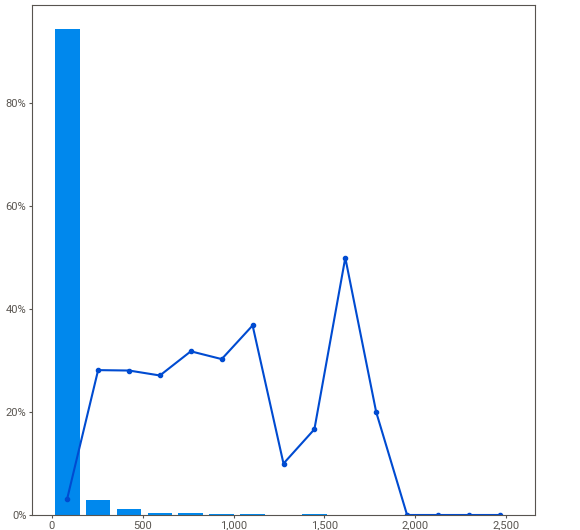
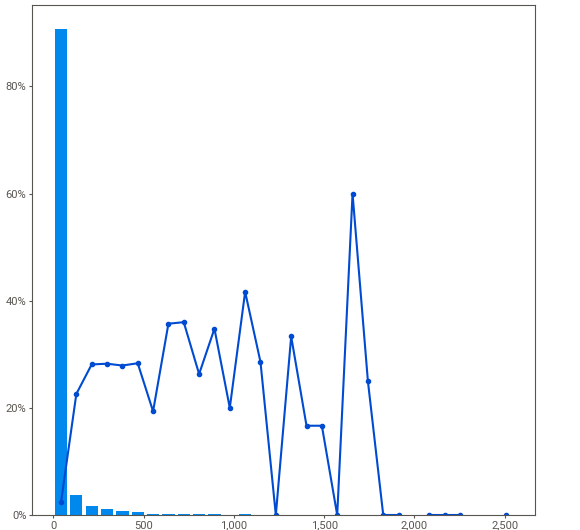
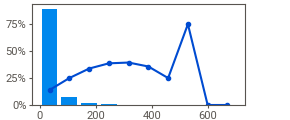
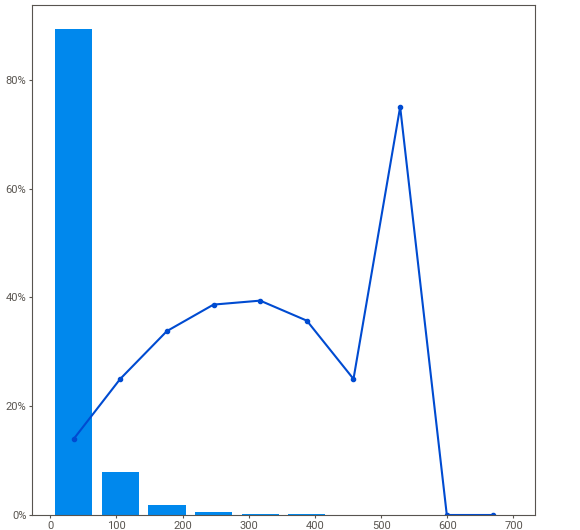
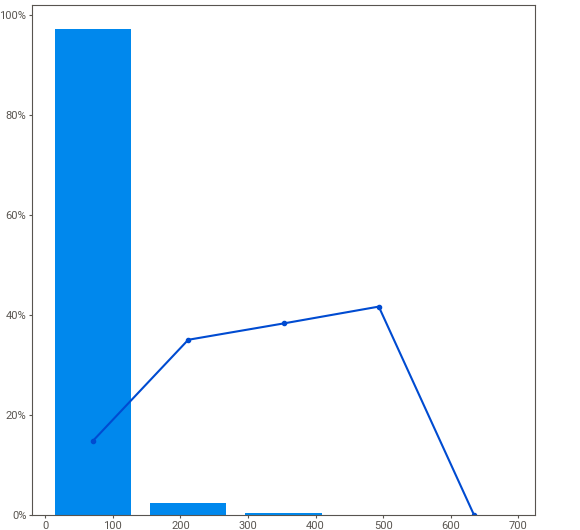
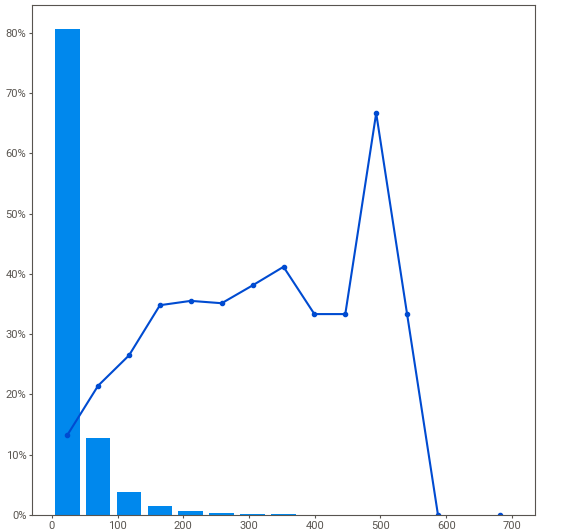
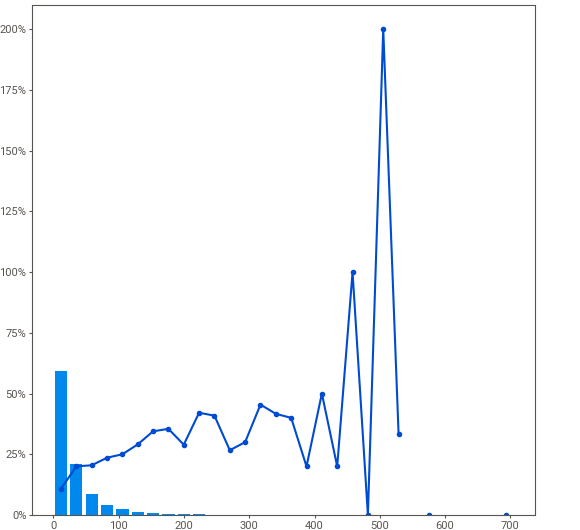
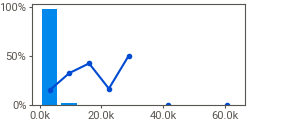
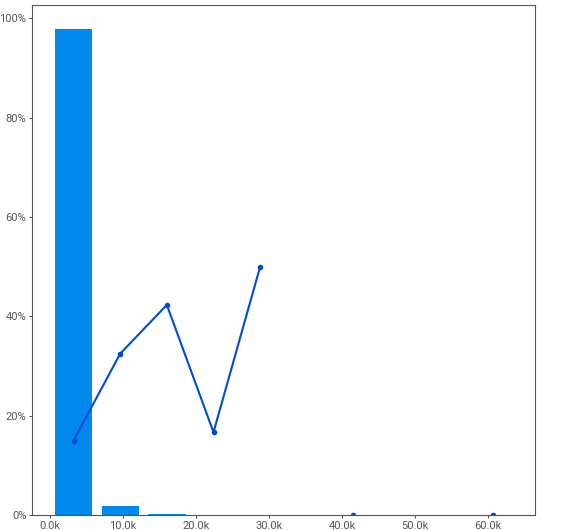
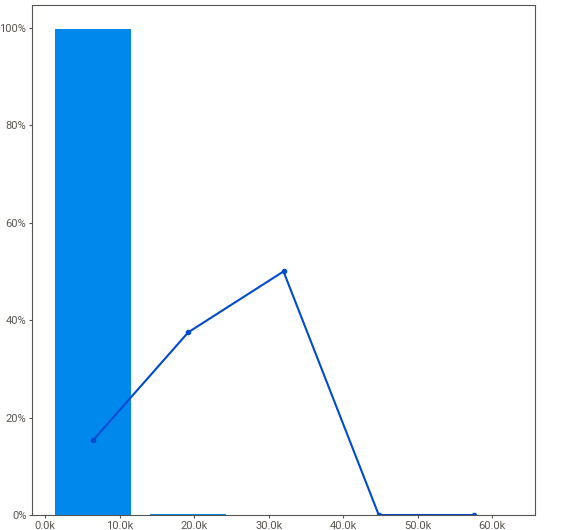
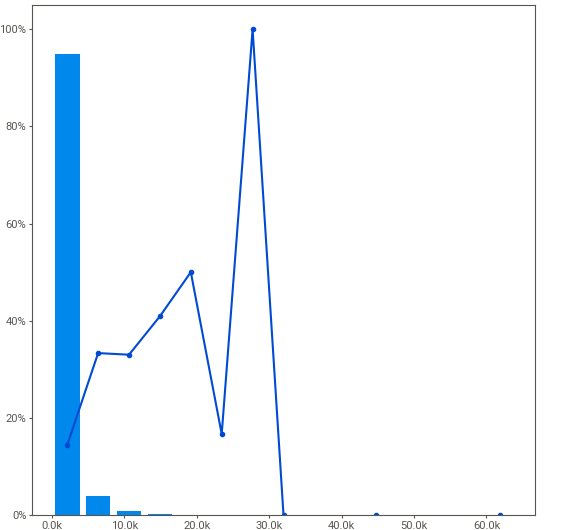
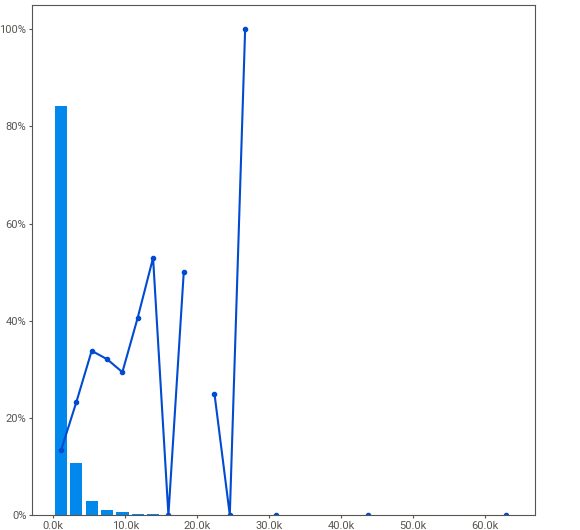
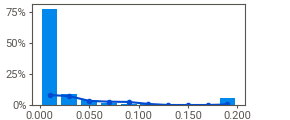
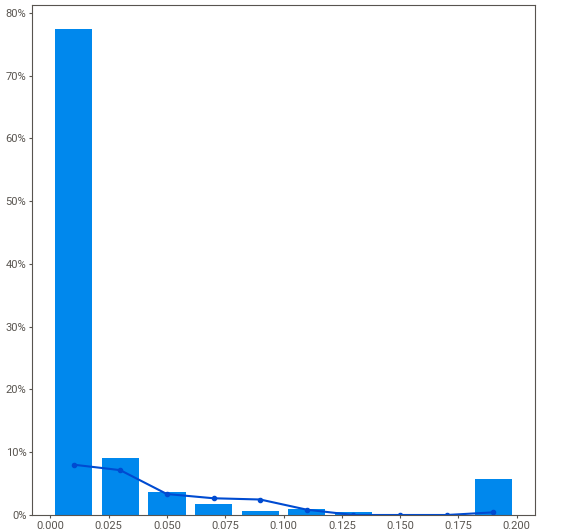
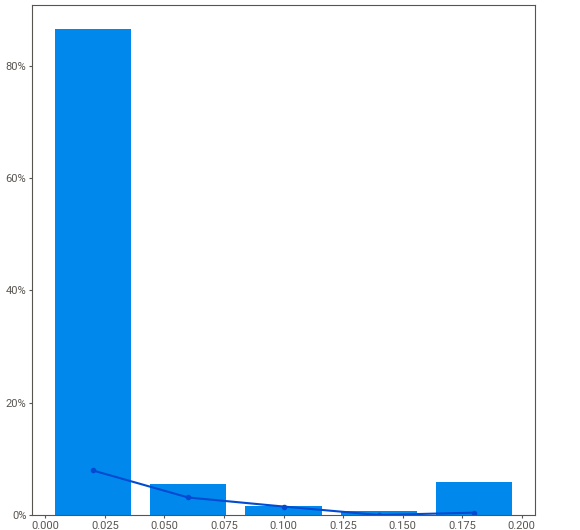
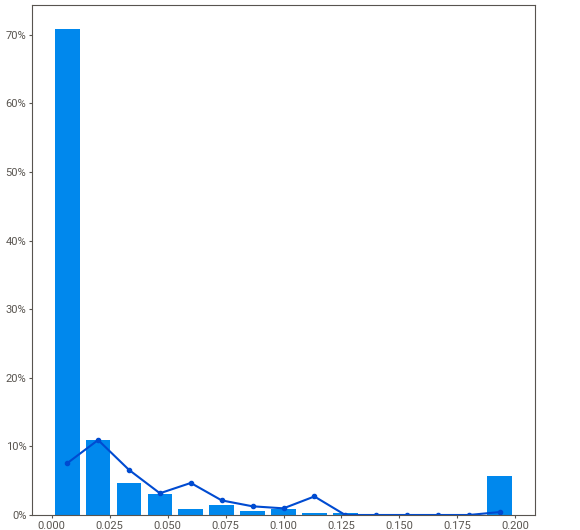
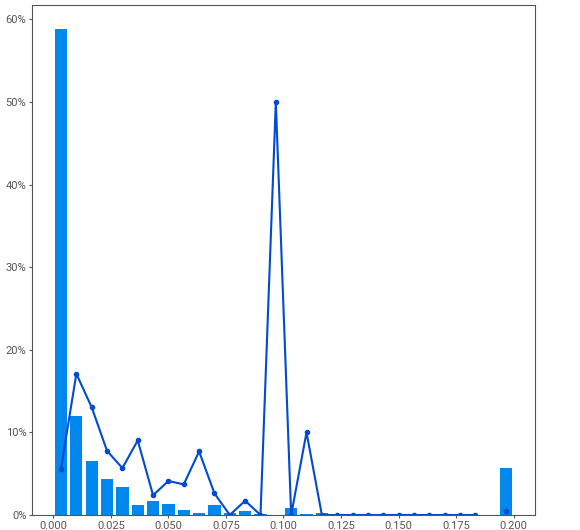
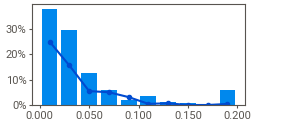
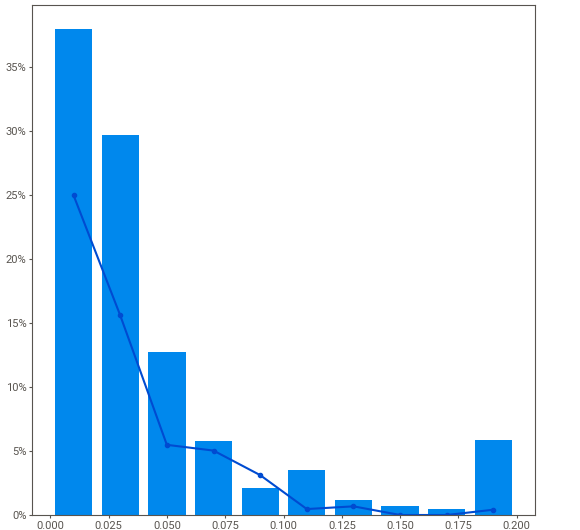
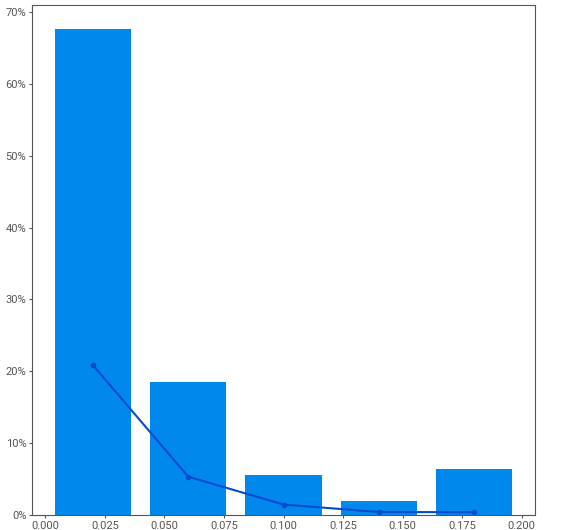
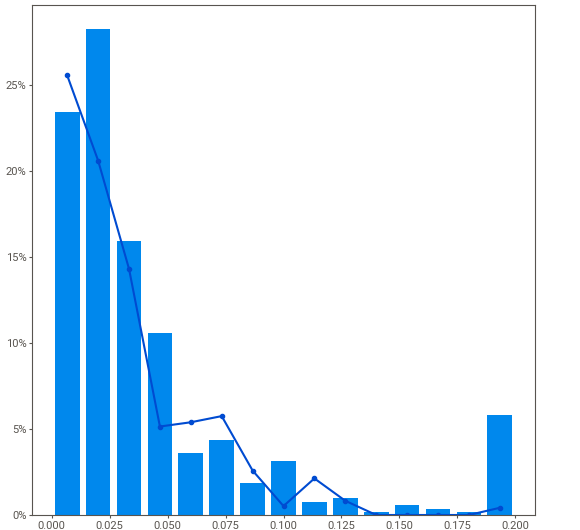
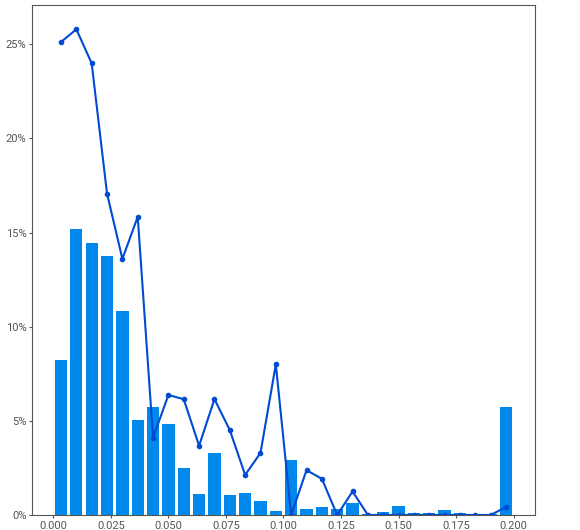
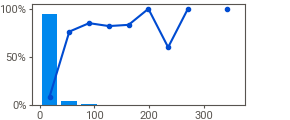
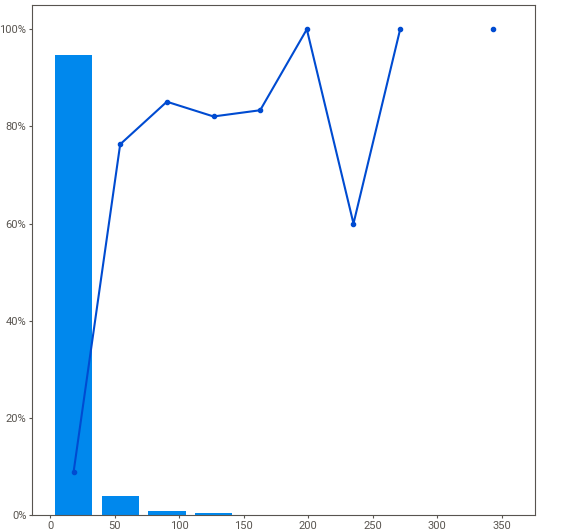
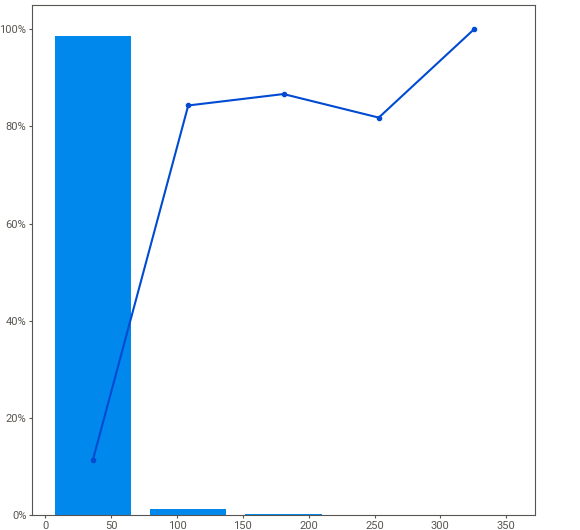
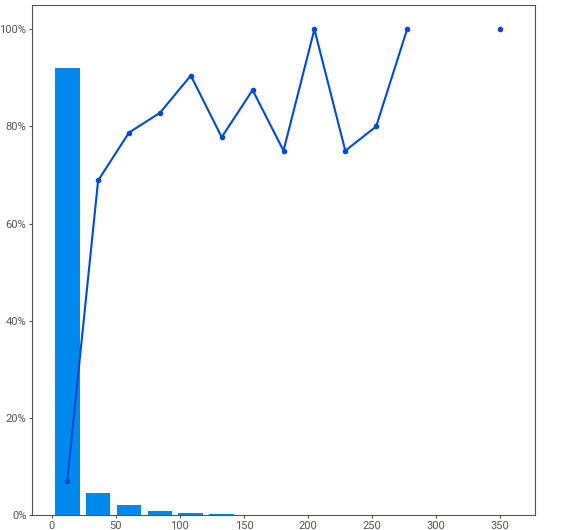
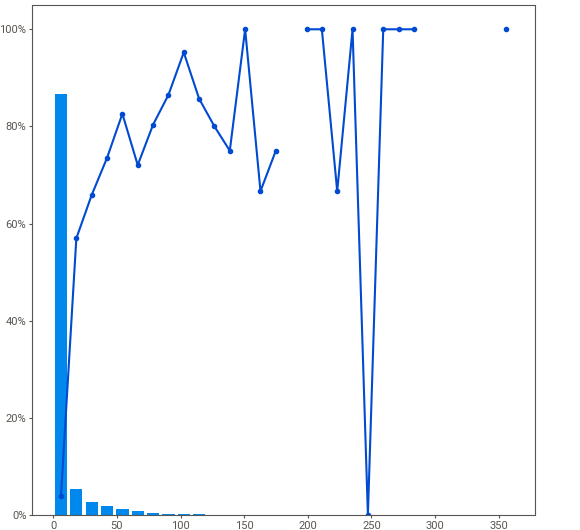
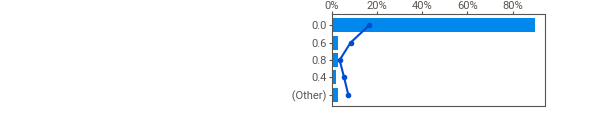
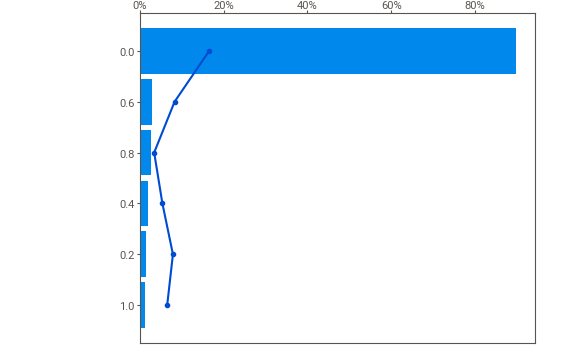
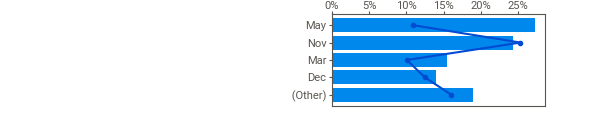
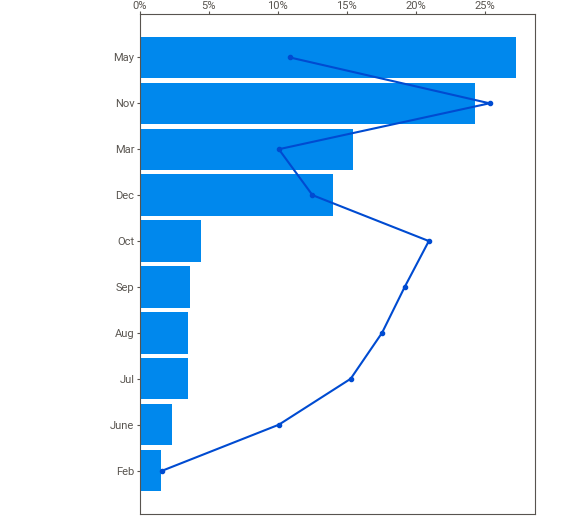
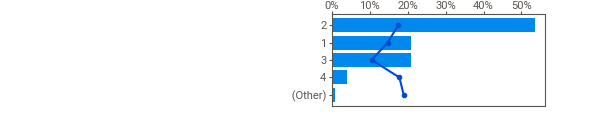
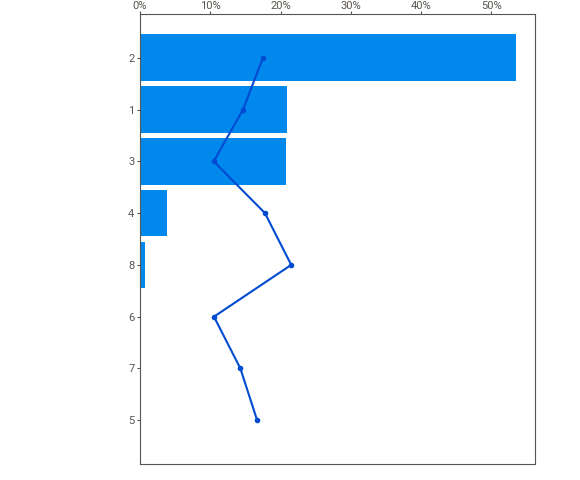
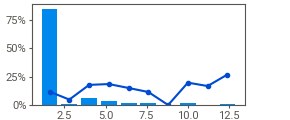
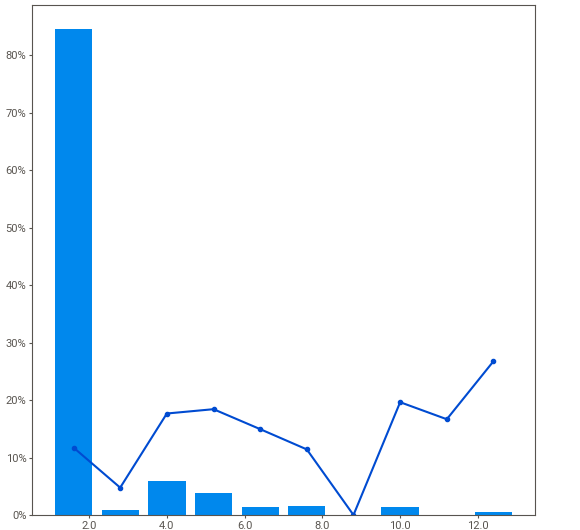
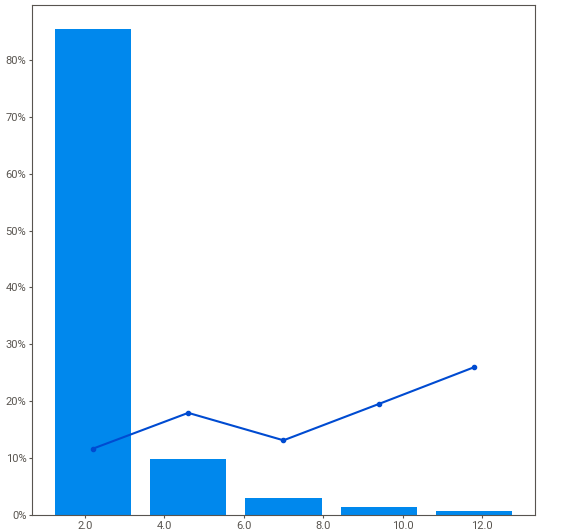
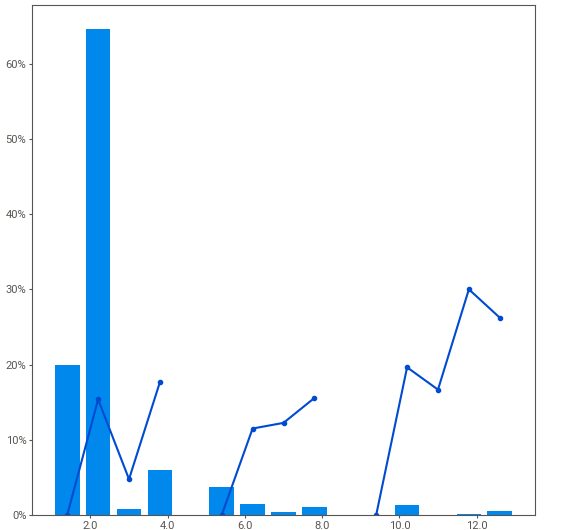
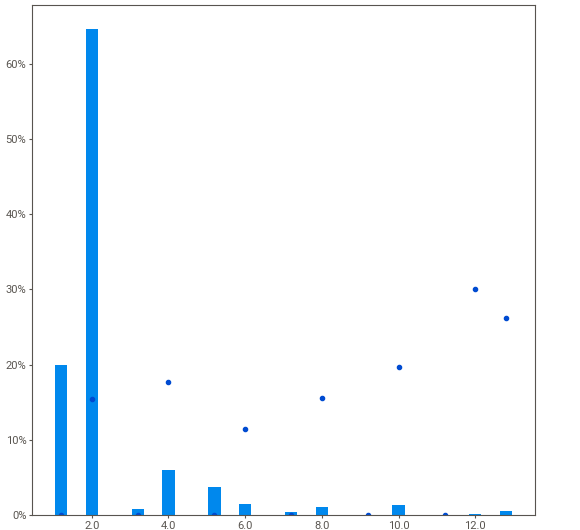
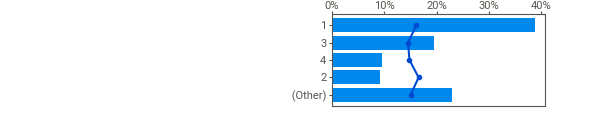
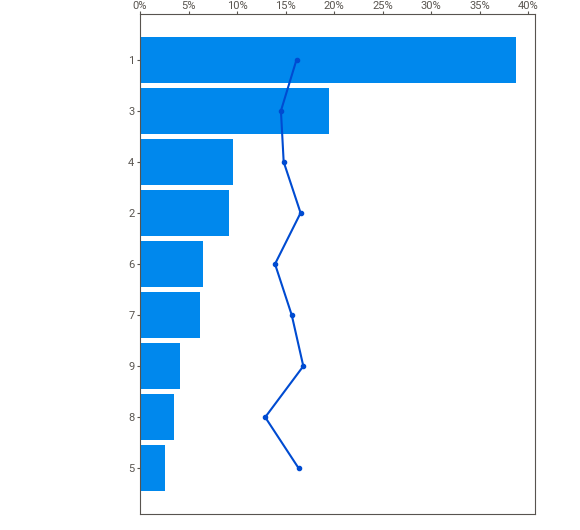
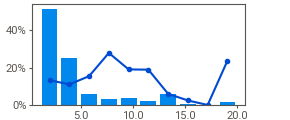
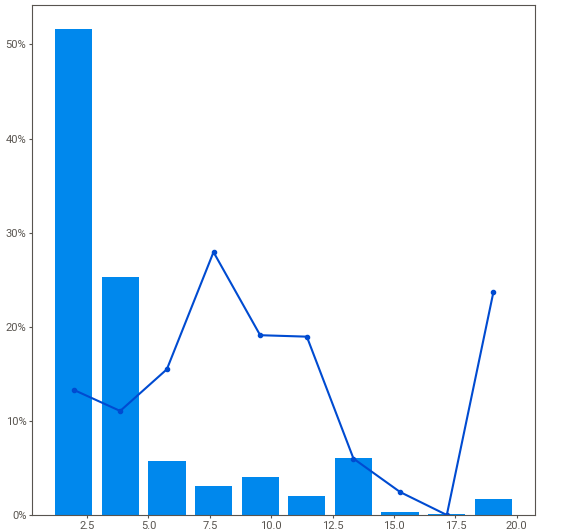
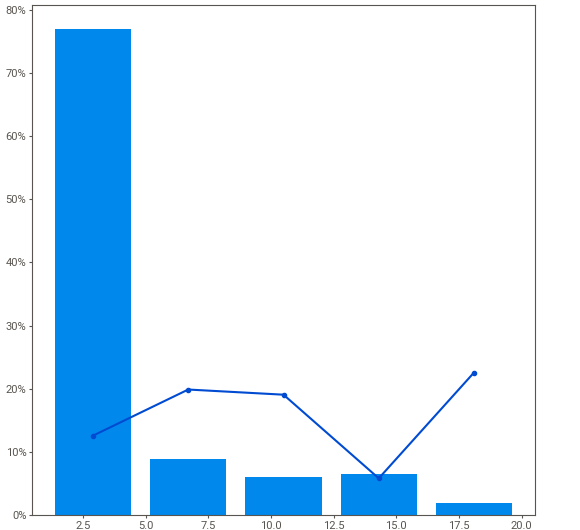
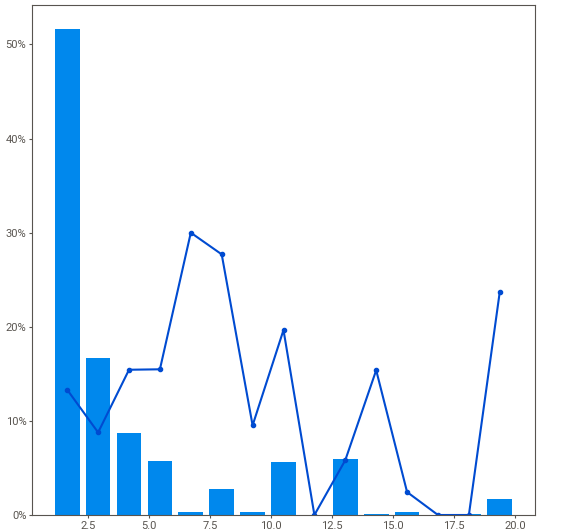
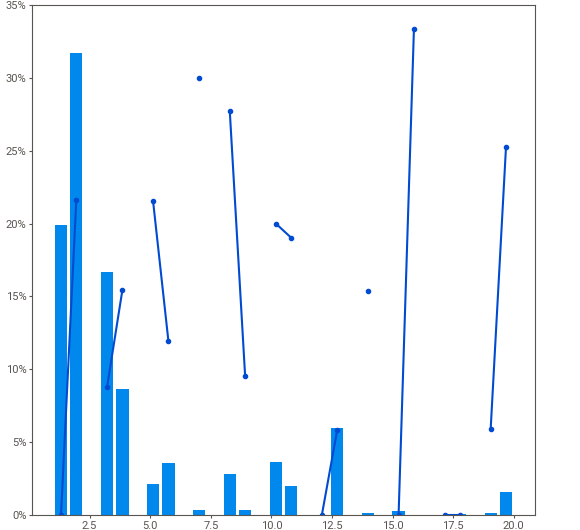
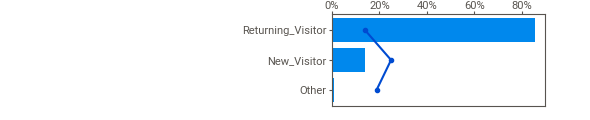
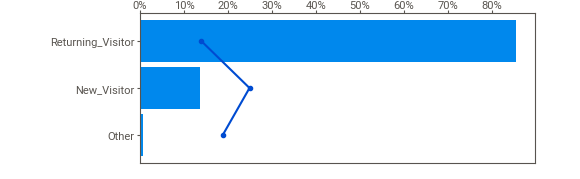
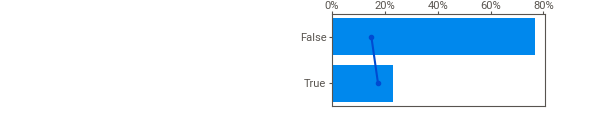
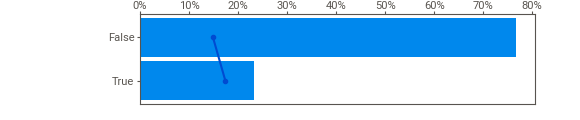
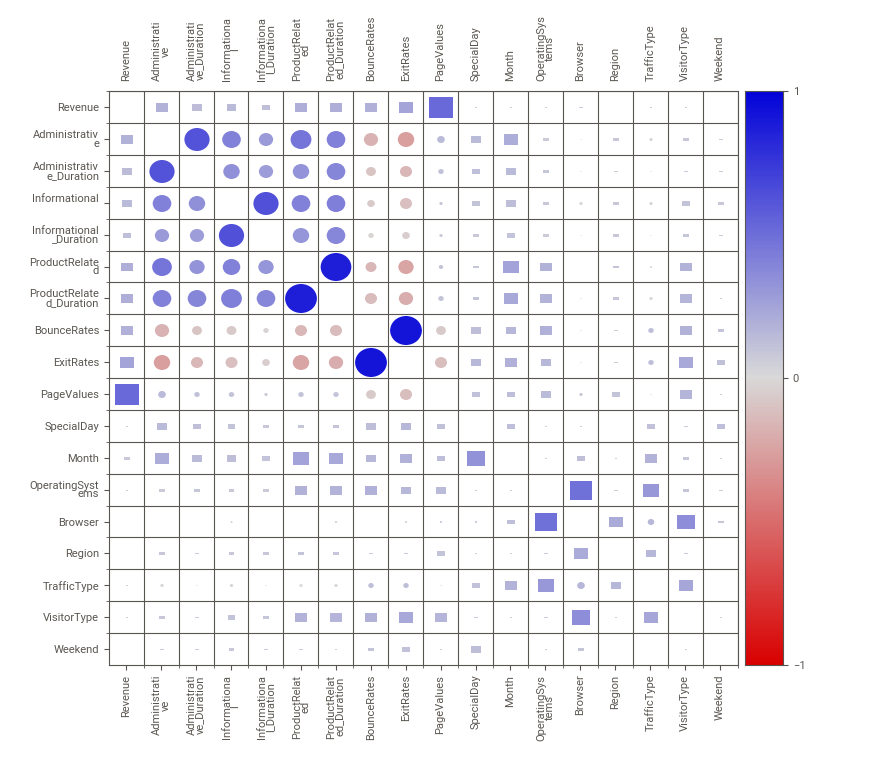
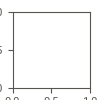

In [43]:
# we can also leverage sweetviz and do a quick and dirty EDA
import sweetviz as sv
sv.analyze(df, target_feat=target).show_notebook()

### Split the data into training and test sets

In [44]:
# Enough eyeballing, let's find the correlation between features

# but lets first split the dataset into train and test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

## Oops! Just reread the question and realized that we need to split monnth wise
df_training_months = df.loc[df['Month'].isin(['June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]
df_test_months = df.loc[df['Month'].isin(['Feb', 'Mar'])]

X_train, y_train = df_training_months.drop(target, axis=1), df_training_months[target]
X_test, y_test = df_test_months.drop(target, axis=1), df_test_months[target]

In [45]:
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)

(6875, 17)
(2091,)
(2091, 17)
(2091,)


In [46]:
# # Sanity check
# X_train.sample(5)
# #Visualize sale over the year
# df_training_months.groupby('Month')['Revenue'].sum().plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

In [47]:
# df_test_months.groupby('Month')['Revenue'].sum().plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

<Figure size 1600x800 with 0 Axes>

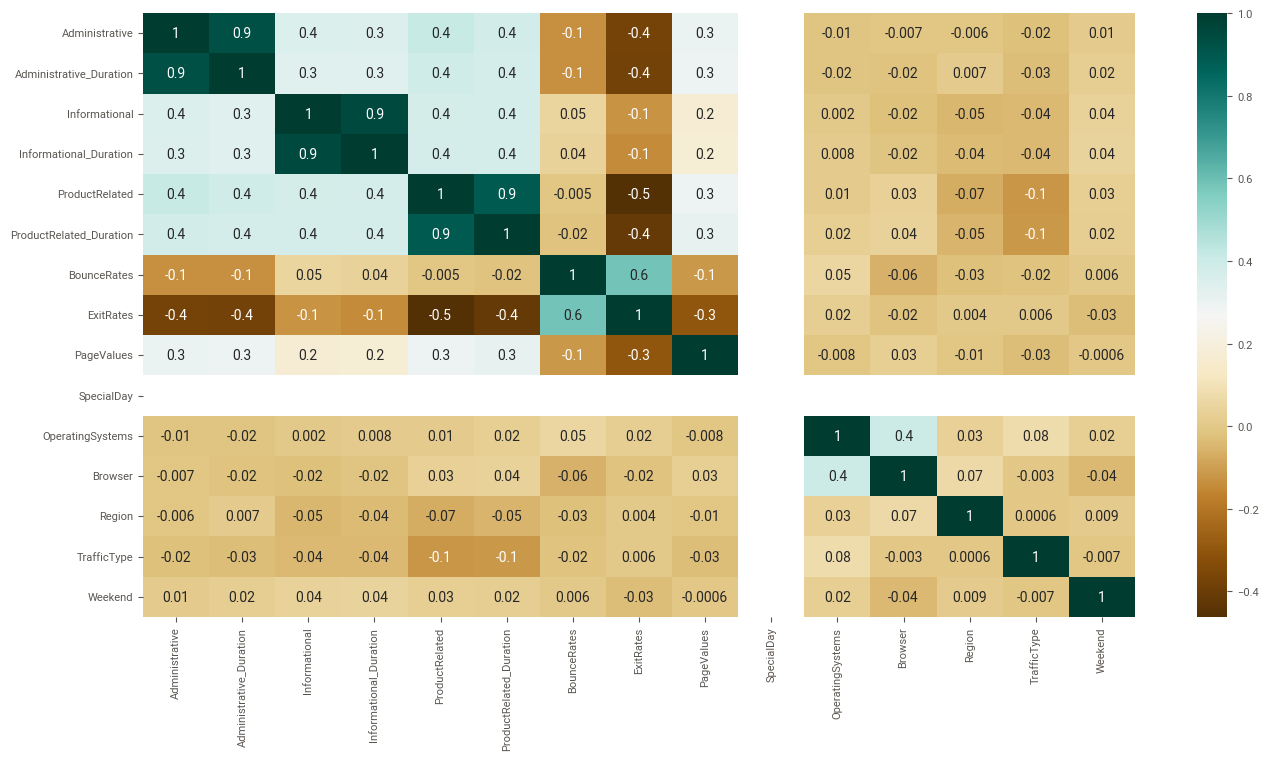

In [48]:
import seaborn as sns
plt.figure(figsize=(16, 8))
corr = X_train.corr(method='spearman')
heatmap = sns.heatmap(corr, annot=True, fmt='.1g', cmap='BrBG')

In [54]:
# It is apparent that we have atleast 3 features are more than 90% correlated and can be dropped
# Administrative, Administrative_Duration
# Informational, Informational_Duration
# ProductRelated, ProductRelated_Duration
repetative_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
X_train = X_train.drop(repetative_features, axis=1)
X_test = X_test.drop(repetative_features, axis=1)
for f in repetative_features:
    num_features.remove(f)

In [55]:
X_train.sample(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10482,0,0,16,0.000000,0.045139,0.0,0.0,Dec,2,2,3,2,Returning_Visitor,False
5975,2,0,18,0.000000,0.017895,0.0,0.0,Nov,2,2,1,2,Returning_Visitor,False
6126,3,0,4,0.057143,0.040000,0.0,0.0,Aug,3,2,6,1,Returning_Visitor,False
9768,2,0,9,0.000000,0.010000,0.0,0.0,Dec,2,4,3,8,Returning_Visitor,False
6189,0,0,3,0.200000,0.200000,0.0,0.0,Nov,1,1,6,6,Returning_Visitor,False


In [56]:
## Lets try a simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [64]:
# We don't need imputer, as there are no missing values
# However, we need to scale the numerical features
numeric_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features)
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(class_weight='balanced'))
])

lr_model = pipeline.fit(X_train, y_train)
print(lr_model.score(X_test, y_test)) 
lr_pred = lr_model.predict(X_test)

0.9167862266857962


In [65]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9167862266857962
precision: 0.5371024734982333
recall: 0.7794871794871795
f1 score: 0.6359832635983262
confusion matrix:
[[1765  131]
 [  43  152]]


In [71]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(n_estimators = 500, random_state = 42, min_samples_split = 10))
])

rf_model = pipeline.fit(X_train, y_train)
print(rf_model.score(X_test, y_test)) 
lr_pred = rf_model.predict(X_test)

0.9483500717360115


In [67]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9440459110473458
precision: 0.7867647058823529
recall: 0.5487179487179488
f1 score: 0.6465256797583081
confusion matrix:
[[1867   29]
 [  88  107]]


# 2. Customer Segmentation

In [73]:
from sklearn.cluster import KMeans

In [79]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=42)
        # YOUR CODE HERE
        model = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('kmeans', kmeans)])
        model.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

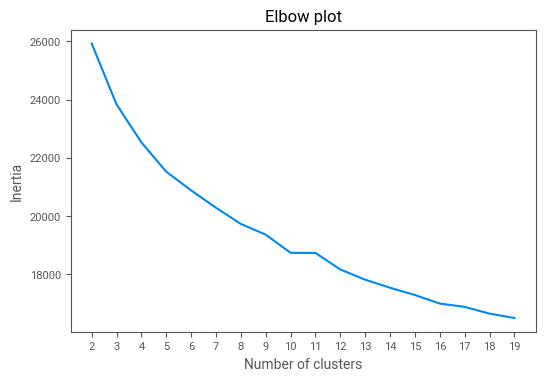

In [81]:
visualize_elbow(X_train, range(2,20))

In [ ]:
# There is a sharp elbow at 10, so lets try with 10 clusters, and a slight one at 5
kmeans = KMeans(n_clusters=10, random_state=42)
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)])
model.fit(X_train)